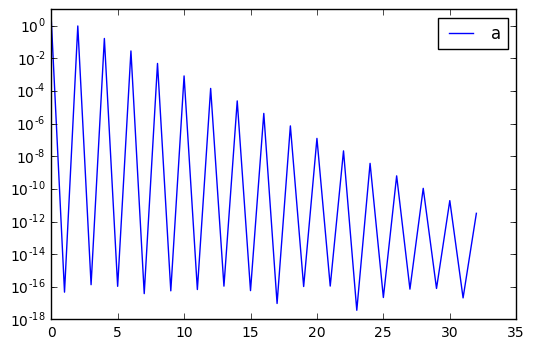

(6.2831853071795862, 32)


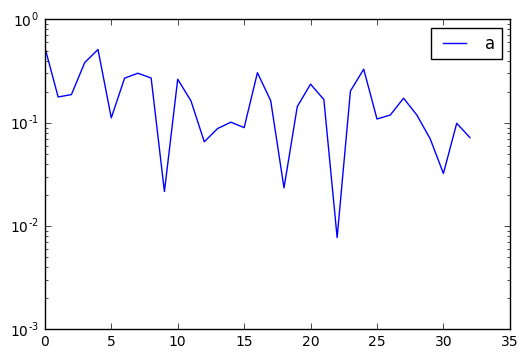

(1.2475038200910673, 32)


In [11]:
import numpy as np
import math
import scipy.linalg as la
from scipy.fftpack import fft
import matplotlib.pyplot as plt

n = 32

# Tschebytschow-Entwicklung mittels FFT
def TE(f, n, b):
    k = np.arange(n + 1.0)
    x = np.cos(np.pi * k / n) # Chebyshev points
    fx = f(x) / (2*n) # evaluate integrand
    g = fft(np.concatenate((fx, fx[-2:0:-1]))).real # fast Fourier transform
    a = np.concatenate(([g[0]], g[1:n] + g[2*n-1:n:-1], [g[n]])) # Chebyshev coefficients
    
    theta = math.acos(b)
    c = np.cos(k * theta)
    return a.dot(c), a

# berechne die Quadraturformel 
def QF(f, n):
    res, a = TE(f, n, 1)
    w = np.zeros(a.shape[0]) # set up weights
    w[0::2] = 2.0 / (1-np.arange(0, n+1, 2)**2)
    
    I = w.dot(a)
    
    if sum(abs(w[k] * a[k]) for k in range(n - 15, n + 1)) <= 1e-15 * abs(I) or (abs(a[k]) <= 1e-15 for k in range(n - 15, n + 1)):
        plt.plot(np.arange(0, len(a), 1), abs(a))
        plt.legend("abs(a)")
        t = np.array([math.log(abs(w[k] * a[k]) + 0.0000001) for k in range(0, len(a))])
#        plt.plot(np.arange(0, len(a), 1), t)
        plt.semilogy(np.arange(0, len(a), 1), t) # korrektur

        plt.show()
        return I, n
    else:
        QF(f, n * 2)
        
# testen
def f(x):
    return 4.0/(x**2 + 1)
def g(x):
    t = math.exp(x)
    return (t/math.cosh(4.0 * math.sin(40.0 * x)))**t

resf = QF(f, n)
# korrektur(alle folgenden)
print(resf)
def f2(x): return (np.exp(x) / np.cosh(4 * np.sin(40 * x)))**np.exp(x)
resf2 = QF(f2, n)
print(resf2)



#resg = QF(g, n)

from scipy import integrate
res = integrate.quad(f, 0, 1)

## Korrektur

Mit der ersten Funktion scheint das ganze ja ganz gut zu funktionieren. Die Werte sollten semilogarithmisch geplottet werden. Ich habe das eingefügt mit dem Befehl semilogy. -1

Ihr hättet nur bei der Funktion f beachten müssen, dass wir das Integral von 0 bis 1 betrachten wollten. Den Wert müsst ihr dann nochmal durch zwei Teilen. -1 

Bei der 2.ten Funktion bekomme ich Fehlermeldungen. Wenn ich sie implementiere bekomme ich leider nicht das richtige Ergebniss und ihr brecht zu früh ab. Schaut euch nochmal euer Abbruchkriterium an -1

7/10

